In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow as tf

In [2]:
df = pd.read_csv('/heart_rate(1).csv')

In [3]:
df.head()

,T1,T2,T3,T4
0,84.2697,91.4634,60.4839,59.2885
1,84.2697,91.4634,60.4839,59.2885
2,84.0619,91.1834,60.4606,59.2885
3,85.6542,91.8788,60.3391,58.8973
4,87.2093,91.1772,60.0762,58.4359


In [4]:
df.tail()

,T1,T2,T3,T4
1795,103.7900,98.6842,NaN,NaN
1796,101.6230,98.6842,NaN,NaN
1797,99.5679,99.0005,NaN,NaN
1798,99.1835,99.3273,NaN,NaN
1799,98.8567,99.5205,NaN,NaN


In [5]:
df1 = df.iloc[:,:2]
df1.head()

,T1,T2
0,84.2697,91.4634
1,84.2697,91.4634
2,84.0619,91.1834
3,85.6542,91.8788
4,87.2093,91.1772


In [6]:
df1.describe()

,T1,T2
count,1800.000000,1800.000000
mean,92.596114,96.637474
std,5.489339,5.687179
min,73.436600,80.213900
25%,88.847400,92.418925
50%,92.205400,98.238450
75%,96.399025,101.362750
max,106.756000,104.895000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T1      1800 non-null   float64
 1   T2      1800 non-null   float64
dtypes: float64(2)
memory usage: 28.2 KB


In [8]:
time_series = pd.date_range('2021-01-01 00:00:00',periods = 1800, freq = '0.5S')

In [9]:
time_series

DatetimeIndex([       '2021-01-01 00:00:00', '2021-01-01 00:00:00.500000',
                      '2021-01-01 00:00:01', '2021-01-01 00:00:01.500000',
                      '2021-01-01 00:00:02', '2021-01-01 00:00:02.500000',
                      '2021-01-01 00:00:03', '2021-01-01 00:00:03.500000',
                      '2021-01-01 00:00:04', '2021-01-01 00:00:04.500000',
               ...
                      '2021-01-01 00:14:55', '2021-01-01 00:14:55.500000',
                      '2021-01-01 00:14:56', '2021-01-01 00:14:56.500000',
                      '2021-01-01 00:14:57', '2021-01-01 00:14:57.500000',
                      '2021-01-01 00:14:58', '2021-01-01 00:14:58.500000',
                      '2021-01-01 00:14:59', '2021-01-01 00:14:59.500000'],
              dtype='datetime64[ns]', length=1800, freq='500L')

In [10]:
df1 = df1.set_index(time_series)

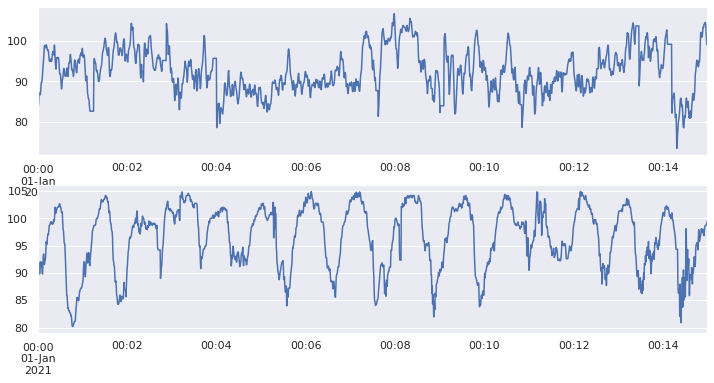

In [11]:
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
df1['T1'].plot()
plt.subplot(2,1,2)
df1['T2'].plot()

In [12]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
print('For T1:\n')
adf_test(df1['T1'])
print('-----------------------------------------------')
print('For T2:\n')
adf_test(df1['T2'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


For T1:

Results of Dickey-Fuller Test:
Test Statistic                   -4.970797
p-value                           0.000025
#Lags Used                       16.000000
Number of Observations Used    1783.000000
Critical Value (1%)              -3.434023
Critical Value (5%)              -2.863162
Critical Value (10%)             -2.567634
dtype: float64
-----------------------------------------------
For T2:

Results of Dickey-Fuller Test:
Test Statistic                -7.455368e+00
p-value                        5.530514e-11
#Lags Used                     2.300000e+01
Number of Observations Used    1.776000e+03
Critical Value (1%)           -3.434037e+00
Critical Value (5%)           -2.863169e+00
Critical Value (10%)          -2.567637e+00
dtype: float64


In [13]:
# for T1 ADF test statistic < critical value, which implies that the series is difference stationary
# for T2 ADF test statistic < critical value, which implies that the series is difference stationary

In [14]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)
#apply adf test on the series
print('For T1:\n')
kpss_test(df1['T1'])
print('-----------------------------------------------')
print('For T2:\n')
kpss_test(df1['T2'])

For T1:

Results of KPSS Test:
Test Statistic            0.160097
p-value                   0.100000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
-----------------------------------------------
For T2:

Results of KPSS Test:
Test Statistic            0.083636
p-value                   0.100000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [15]:
# for T1 KPSS test statistic < critical value, which implies that the series is stationary
# for T2 KPSS test statistic < critical value, which implies that the series is stationary

In [16]:
# for T1 Both tests conclude that the series is stationary -> series is stationary
# for T2 Both tests conclude that the series is stationary -> series is stationary
# also our data is stationary by the matter of the tests, but we use differencing method in order to
# follow the articles sections

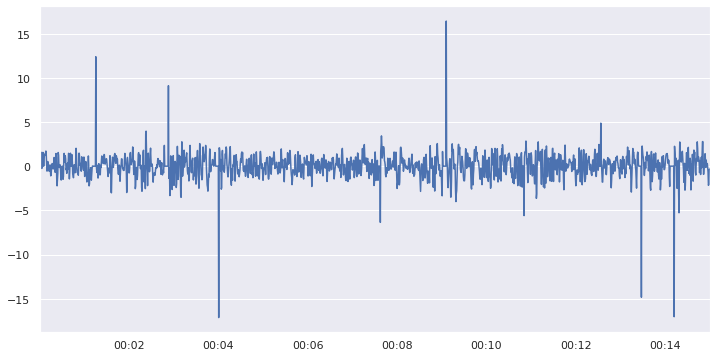

In [17]:
plt.figure(figsize = (12,6))
df1['T1_stat'] = df1['T1'] - df1['T1'].shift(1)
df1['T1_stat'].dropna().plot()

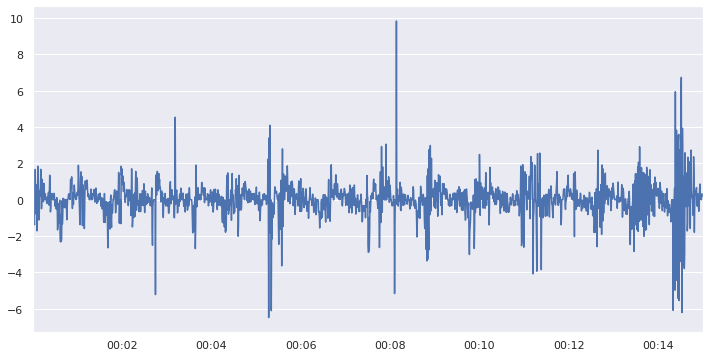

In [18]:
plt.figure(figsize = (12,6))
df1['T2_stat'] = df1['T2'] - df1['T2'].shift(1)
df1['T2_stat'].dropna().plot()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df1[['T1_stat','T2_stat']].dropna().index
y = df1[['T1_stat','T2_stat']].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = MinMaxScaler()

scaler.fit(X_train[:,None])
X_train = scaler.transform(X_train[:,None])
X_test = scaler.transform(X_test[:,None])

scaler.fit(y_train.values)
y_train = scaler.transform(y_train.values)
y_test = scaler.transform(y_test.values)

y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [55]:
BATCH_SIZE = 64
BUFFER_SIZE = 100
WINDOW_LENGTH = 30


def window_data(X, Y, window=7):
    '''
    The dataset length will be reduced to guarante all samples have the window, 
    so new length will be len(dataset)-window
    '''
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)


X_w = np.concatenate((X_train, X_test))
y_w = np.concatenate((y_train, y_test))

X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)

X_train_w = X_w[:-len(X_test)]
y_train_w = y_w[:-len(X_test)]
X_test_w = X_w[-len(X_test):]
y_test_w = y_w[-len(X_test):]

print(f"Test set equal: {np.array_equal(y_test_w,y_test)}")

train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()


Test set equal: True


In [21]:
import tensorflow as tf

In [60]:
dropout = 0.0
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

simple_lstm_model.compile(optimizer='rmsprop', loss='mse')

EVALUATION_INTERVAL = 200
EPOCHS = 10

model_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)  # ,callbacks=[tensorboard_callback]) #Uncomment this line for tensorboard support


Epoch 1/10
200/200 [==============================] - 16s 58ms/step - loss: 0.0109 - val_loss: 0.0070
Epoch 2/10
200/200 [==============================] - 11s 55ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 3/10
200/200 [==============================] - 11s 56ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 4/10
200/200 [==============================] - 11s 55ms/step - loss: 0.0040 - val_loss: 0.0056
Epoch 5/10
200/200 [==============================] - 11s 55ms/step - loss: 0.0039 - val_loss: 0.0047
Epoch 6/10
200/200 [==============================] - 11s 56ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 7/10
200/200 [==============================] - 11s 56ms/step - loss: 0.0039 - val_loss: 0.0053
Epoch 8/10
200/200 [==============================] - 11s 56ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 9/10
200/200 [==============================] - 11s 55ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 10/10
200/200 [==============================] - 11s 55ms/step - loss: 0.003

In [65]:
yhat = simple_lstm_model.predict(X_test_w).reshape(1, -1)[0]
#resultsDict['Tensorflow simple LSTM'] = evaluate(y_test, yhat)
#predictionsDict['Tensorflow simple LSTM'] = yhat

In [66]:
yhat

array([0.5161228 , 0.5167502 , 0.5175026 , 0.5143834 , 0.51077425,
       0.5058921 , 0.505382  , 0.5067942 , 0.5033282 , 0.49892303,
       0.50356495, 0.5057665 , 0.5126981 , 0.51022965, 0.509023  ,
       0.51217186, 0.5156688 , 0.5211351 , 0.51224   , 0.5074631 ,
       0.5081327 , 0.50741595, 0.51292783, 0.5075096 , 0.505177  ,
       0.5093163 , 0.5110396 , 0.5142265 , 0.51247436, 0.51171017,
       0.5122539 , 0.5129779 , 0.5134825 , 0.51361936, 0.51466024,
       0.51299673, 0.51246977, 0.51102304, 0.5113518 , 0.5118295 ,
       0.51482594, 0.51531607, 0.5168616 , 0.5172343 , 0.50985414,
       0.5073438 , 0.50519276, 0.50508   , 0.50539786, 0.5014028 ,
       0.5070924 , 0.50489724, 0.5061647 , 0.5114747 , 0.5161603 ,
       0.521493  , 0.52752775, 0.51214534, 0.51210374, 0.52133185,
       0.5145581 , 0.51416194, 0.51573974, 0.5117693 , 0.51133066,
       0.5154763 , 0.51712173, 0.51719767, 0.51725715, 0.51830196,
       0.51476467, 0.5184368 , 0.5184925 , 0.51022226, 0.50855